                   State  1988  1989  1990  1991  1992  1993  1994  1995  \
0                Alabama    52    46    47    43    61    76    70    59   
1                 Alaska    10     7     7    13     8     8    16     9   
2                Arizona    18    23    36    21    26    48    47    36   
3               Arkansas    24    18    22    28    38    28    41    48   
4             California   163   159   197   230   274   345   397   404   
5               Colorado    20    17    25    17    17    34    30    44   
6            Connecticut    14    14    22    18    31    30    36    52   
7               Delaware     3     3     0     6     6     5    12     9   
8   District of Columbia     5     4     8     6    12    13     7    10   
9                Florida    61    73    82   103   106    94   114   139   
10               Georgia    59    62    55    66    73    73    90   106   
11                Hawaii     1     7     4     3    10     4    10    12   
12          

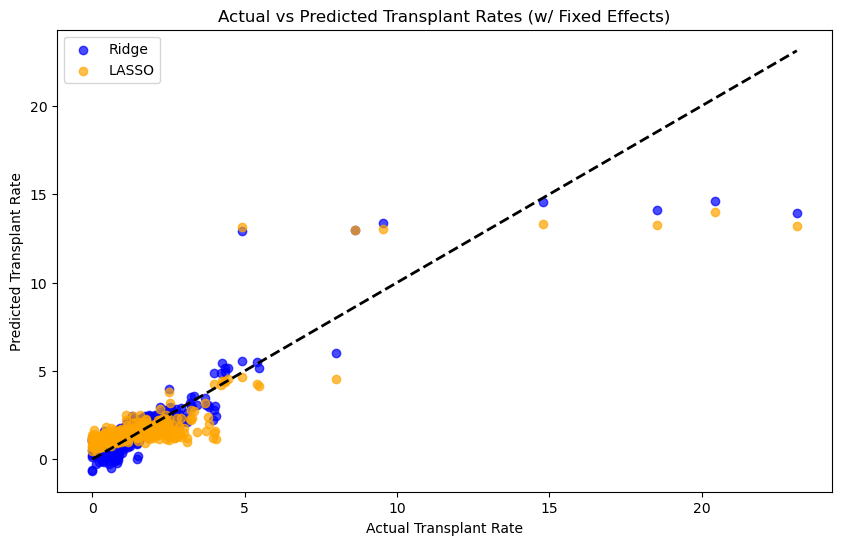

/opt/conda/lib/python3.12/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 85, but rank is 39
  warnings.warn('covariance of constraints does not have full '


                            OLS Regression Results                            
Dep. Variable:        Transplant Rate   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1070.
Date:                Wed, 17 Dec 2025   Prob (F-statistic):           2.74e-57
Time:                        03:35:26   Log-Likelihood:                -2109.3
No. Observations:                1739   AIC:                             4391.
Df Residuals:                    1653   BIC:                             4860.
Df Model:                          85                                         
Covariance Type:              cluster                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

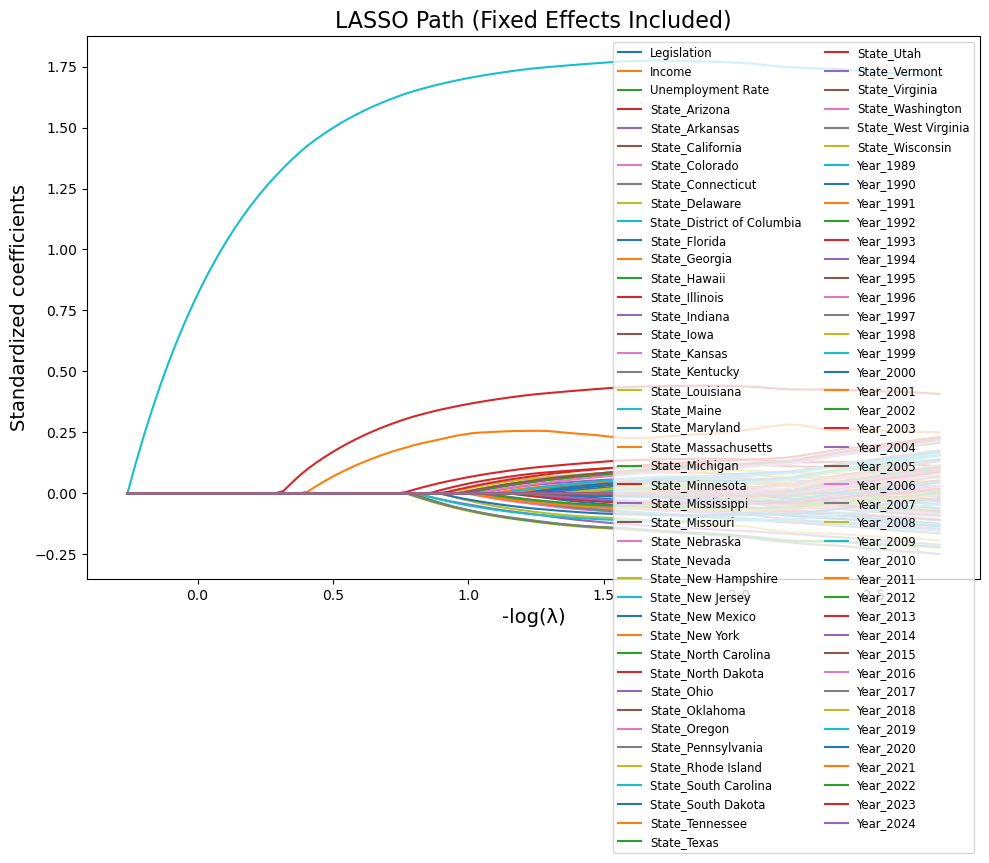

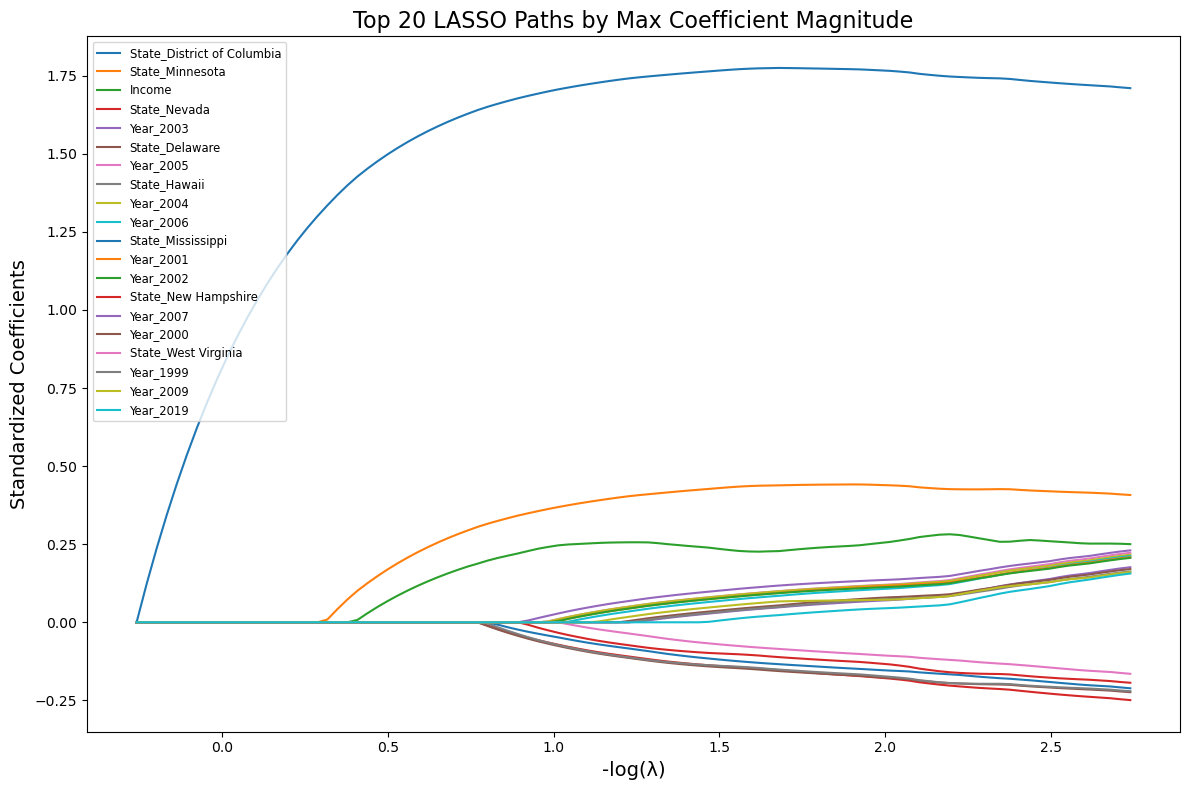

SUMMARY STATISTICS
       Transplant Rate         Income  Unemployment Rate  Legislation
count      1739.000000    1739.000000        1739.000000  1739.000000
mean          1.831641   71463.225992           5.305865     0.432432
std           2.195629   12954.129758           1.902107     0.495556
min           0.000000   41070.000000           1.800000     0.000000
25%           0.841844   62045.000000           3.900000     0.000000
50%           1.474714   69990.000000           5.000000     0.000000
75%           2.173946   79630.000000           6.300000     1.000000
max          23.121387  115800.000000          13.500000     1.000000


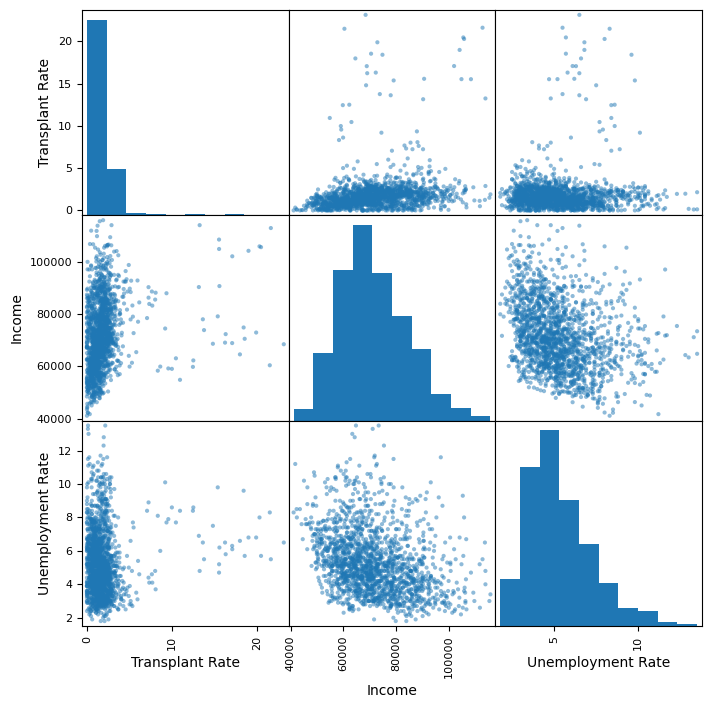

            Transplant Rate                                               \
                      count      mean       std  min       25%       50%   
Legislation                                                                
0.0                   987.0  1.869797  2.771577  0.0  0.772107  1.286758   
1.0                   752.0  1.781562  1.032819  0.0  1.067997  1.722807   

                                 Income                ...                     \
                  75%        max  count          mean  ...      75%       max   
Legislation                                            ...                      
0.0          1.968101  23.121387  987.0  68466.727457  ...  75090.0  113900.0   
1.0          2.373740   7.676384  752.0  75396.130319  ...  84107.5  115800.0   

            Unemployment Rate                                                
                        count      mean       std  min  25%  50%  75%   max  
Legislation                                              

/opt/conda/lib/python3.12/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 85, but rank is 39
  warnings.warn('covariance of constraints does not have full '


In [1]:
 #help from chatgpt for learner models
    
    !pip install -q xgboost
    !pip install -q dowhy
    !pip install -q lightgbm


  
    
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split, cross_val_score
    from sklearn.linear_model import Ridge, Lasso, lasso_path, RidgeCV, LassoCV
    from sklearn.preprocessing import StandardScaler
    from sklearn.pipeline import make_pipeline
    from sklearn.metrics import r2_score, mean_absolute_error
    from sklearn.model_selection import GridSearchCV, KFold
    from sklearn.linear_model import Ridge, Lasso
    from sklearn.preprocessing import StandardScaler
    import statsmodels.api as sm
    from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
    from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report




    
    
    import xgboost as xgb
    from sklearn.model_selection import cross_val_predict

    
    statecount = pd.read_csv('Organ Counts by State.csv')
    print(statecount)
    
 

    # View the first few rows
    #print(df_long.head())

    
    # For a CSV file
    df = pd.read_csv('US Transplants Cleaned.csv')
    
    print(df)
    living_donors = df[df['Donor Type'] == 'Living Donor']
    mean_transplants = living_donors['Transplants'].mean()
    std_transplants = living_donors['Transplants'].std()
    
    
    df = df[df['Donor Type'] == 'Living Donor']
    
    
    #df = df[df['State'] != 'District of Columbia']
    print(mean_transplants, std_transplants)

    print(df)
    
    #think about weighting of DC vs other locations
    
    popn = pd.read_csv('Annual US State Populations 3.csv')


    
    
    
    
    pop_long = popn.melt(id_vars='observation_date', var_name='State', value_name='Population')

    # Rename observation_date to Year
    pop_long.rename(columns={'observation_date': 'Year'}, inplace=True)
    


    
    txrate = pd.merge(df, pop_long, on=['State', 'Year'], how='left')

    # Calculate Transplant Rate (per 100,000 people)
    txrate['Transplant Rate'] = (txrate['Transplants'] / txrate['Population']) * 100
    
    txrate = pd.merge(df, pop_long, on=['State', 'Year'], how='left')
    
    df['Year'] = df['Year'].astype(int)
    pop_long['Year'] = pop_long['Year'].astype(int)
    
    txrate['Transplant Rate'] = (txrate['Transplants'] / txrate['Population']) * 100
    
    print(txrate[['State', 'Year', 'Donor Type', 'Transplants', 'Population', 'Transplant Rate']].head())
    
    
   
    
        
    income = pd.read_csv("State Income Per Year.csv")
    
    income_long = income.melt(id_vars='Unnamed: 0', var_name='State', value_name='Income')

    # Rename to match other data
    income_long.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)
    income_long['Year'] = income_long['Year'].astype(int)
    income_long['State'] = income_long['State'].str.strip()

    law = pd.read_csv("Organ Legislation by State.csv")

    
    
    
    law_long = law.melt(id_vars='observation_date', var_name='State', value_name='Legislation')

    law_long.rename(columns={'observation_date': 'Year'}, inplace=True)
    law_long['Year'] = law_long['Year'].astype(int)
    law_long['State'] = law_long['State'].str.strip()


    
    
    poverty = pd.read_csv("poverty_rate_by_state_corrected.csv")
    
    unemp = pd.read_csv("Annual Unemployment Rate by State.csv")
    
    

    
    # Merge law data
    merged = pd.merge(txrate, law_long, on=['State', 'Year'], how='left')

    # Merge income data
    merged = pd.merge(merged, income_long, on=['State', 'Year'], how='left')


    
    unemp_long = unemp.melt(id_vars='observation_date', var_name='State', value_name='Unemployment Rate')
    unemp_long.rename(columns={'observation_date': 'Year'}, inplace=True)


    
    
    
    # Merge poverty
    merged = pd.merge(merged, poverty, on=['State', 'Year'], how='left')

    # Merge unemployment
    merged = pd.merge(merged, unemp_long, on=['State', 'Year'], how='left')

    

    
    missing_states = set(txrate['State'].unique()) - set(income_long['State'].unique())
    print("States missing from income file:", missing_states)
    
    model_cols = ['Transplant Rate', 'Legislation', 'Income', 'Unemployment Rate']

    # Drop rows where any of these are missing
    cleaned = merged[merged['Donor Type'] == 'Living Donor']
    cleaned = cleaned.dropna(subset=model_cols)


    print("Before dropping NaNs:", merged.shape)
    print("After dropping NaNs:", cleaned.shape)
    
    merged.to_csv("final_transplant_dataset_full_cleaned.csv", index=False)
    
    print("FILE")
    
    print(merged)
    

    

    

    





    
    cleaned = merged[merged['Donor Type'] == 'Living Donor']
    
    baseline = cleaned.loc[cleaned["Year"] == 1988, ["State", "Transplant Rate"]].copy()
    baseline = baseline.rename(columns={"Transplant Rate": "baseline"})
    cleaned = cleaned.merge(baseline, on="State", how="left")
    
    print(cleaned,'hu')
    cleaned = cleaned.dropna(subset=['Transplant Rate', 'Legislation', 'Income', 'Unemployment Rate'])

    cleaned_time = cleaned
    # Add dummies for fixed effects
    cleaned_dummies = pd.get_dummies(cleaned, columns=['State', 'Year'], drop_first=True)
    
    #cleaned_time = pd.get_dummies(cleaned, columns=['State'], drop_first=True)
    
    #cleaned_time = cleaned_time.drop(['Donor Type', 'Transplants', 'Population'])
    
    X = cleaned_dummies.drop(['Transplant Rate', 'Donor Type', 'Transplants', 'Population', 'Unemployment Rate'], axis=1, errors='ignore')
    y = cleaned_dummies['Transplant Rate']
    
    



    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Ridge with fixed effects
    ridge = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
    ridge.fit(X_train, y_train)
    ridge_preds = ridge.predict(X_test)

    # LASSO with fixed effects
    lasso = make_pipeline(StandardScaler(), Lasso(alpha=0.1, max_iter=10000))
    lasso.fit(X_train, y_train)
    lasso_preds = lasso.predict(X_test)

    # Evaluation
    print("Ridge R²:", r2_score(y_test, ridge_preds))
    print("Ridge MAE:", mean_absolute_error(y_test, ridge_preds))
    print("LASSO R²:", r2_score(y_test, lasso_preds))
    print("LASSO MAE:", mean_absolute_error(y_test, lasso_preds))


    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, ridge_preds, alpha=0.7, label='Ridge', color='blue')
    plt.scatter(y_test, lasso_preds, alpha=0.7, label='LASSO', color='orange')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

    plt.xlabel('Actual Transplant Rate')
    plt.ylabel('Predicted Transplant Rate')
    plt.title('Actual vs Predicted Transplant Rates (w/ Fixed Effects)')
    plt.legend()
    plt.show()
    


    # Select features and response
    df_fe = cleaned[cleaned['Donor Type'] == 'Living Donor'].dropna(subset=['Transplant Rate', 'Legislation', 'Income', 'State', 'Year','Unemployment Rate'])

    
    
    df_fe['State'] = df_fe['State'].astype('category')
    df_fe['Year'] = df_fe['Year'].astype('category')
    
    # Fixed effects as dummies
    X = pd.get_dummies(df_fe[['Legislation', 'Income', 'State', 'Year', 'Unemployment Rate']], drop_first=True)
    y = df_fe['Transplant Rate']
    
    
    
    year_dummies = X.filter(like='Year_')

    
    
    #OLS MODEL
    
    X_ols = X.copy()
    y_ols = y.copy()

    #Drop rows with any missing values in X or y
    valid_idx = X_ols.dropna().index.intersection(y_ols.dropna().index)
    
    X_ols = X_ols.loc[valid_idx]
    y_ols = y_ols.loc[valid_idx]
    X_ols = X_ols.apply(pd.to_numeric, errors='coerce').astype(float)

    # Add constant and fit model
    X_ols = sm.add_constant(X_ols)

    
    ols_model = sm.OLS(y_ols, X_ols)
    
    fitted_model = ols_model.fit(cov_type='cluster', cov_kwds={'groups': df_fe['State']})
    
    print(fitted_model.summary())
    

    

    #pca = PCA(n_components=1)
    #year_pc = pca.fit_transform(year_dummies)

    # Add back to X
    #X['Year_PC1'] = year_pc
    #X = X.drop(columns=year_dummies.columns)

    # Standardize X
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Get LASSO path
    alphas, coefs, _ = lasso_path(X_scaled, y, alphas=None)

    # Plot
    plt.figure(figsize=(10, 8))
    
 

    for i, feature in enumerate(X.columns):
        plt.plot(-np.log10(alphas), coefs[i], label=feature)

    plt.xlabel('-log(λ)', fontsize=14)
    plt.ylabel('Standardized coefficients', fontsize=14)
    plt.title('LASSO Path (Fixed Effects Included)', fontsize=16)
    plt.legend(loc='best', fontsize='small', ncol=2)
    plt.tight_layout()
    plt.show()
    
    
    
    # Compute max absolute coefficient for each variable over the LASSO path
    max_coefs = np.max(np.abs(coefs), axis=1)

    # Get indices of top 20
    top_20_indices = np.argsort(max_coefs)[-20:][::-1]  # reverse to get descending

    # Plot only top 20
    plt.figure(figsize=(12, 8))

    for i in top_20_indices:
        plt.plot(-np.log10(alphas), coefs[i], label=X.columns[i])

    plt.xlabel('-log(λ)', fontsize=14)
    plt.ylabel('Standardized Coefficients', fontsize=14)
    plt.title('Top 20 LASSO Paths by Max Coefficient Magnitude', fontsize=16)
    plt.legend(loc='best', fontsize='small')
    plt.tight_layout()
    plt.show()
    
    #SUMMARY STATISTICS
    
    print("SUMMARY STATISTICS")
    
    print(cleaned_dummies[['Transplant Rate', 'Income', 'Unemployment Rate','Legislation']].describe())
    
    pd.plotting.scatter_matrix(cleaned_dummies[['Transplant Rate', 'Income', 'Unemployment Rate']], figsize=(8, 8), diagonal='hist')
    
    plt.show()
    
    print(cleaned_dummies[['Transplant Rate', 'Income', 'Unemployment Rate', 'Legislation']]
          .groupby('Legislation').describe())
    
    latex_table = fitted_model.summary().as_latex()

    with open("ols_results_table.tex", "w") as f:
        f.write(latex_table)

    print(latex_table)
    
    print(fitted_model.summary(xname=list(X_ols.columns)))
    
    import statsmodels.api as sm


    fe_model = sm.OLS(y_ols, X_ols).fit(cov_type='cluster', cov_kwds={'groups': df_fe['State']})
    print(fe_model.summary())
    
    
    print(cleaned)

In [2]:

# 📚 STEP 2. Import libraries
# ======================================
!pip install -q "numpy<2.0.0" "shap<0.45.0"
!pip install -q econml dowhy lightgbm

from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from econml.metalearners import SLearner, TLearner, XLearner
import warnings
warnings.filterwarnings("ignore")

# ======================================
# 📊 STEP 3. Prepare your data
# ======================================
# Example: assuming you already have a DataFrame called `cleaned_time`
# Replace these column names with your actual ones
T = cleaned_time['Legislation']                # Treatment (0 or 1)
Y = cleaned_time['Transplant Rate']            # Outcome variable
X = cleaned_time[['Income', 'Unemployment Rate', 'Year']]  # Covariates

# Split into train/test sets
X_train, X_test, T_train, T_test, Y_train, Y_test = train_test_split(
    X, T, Y, test_size=0.2, random_state=42
)

# ======================================
# 🧠 STEP 4. Estimate causal effects
# ======================================

# --- 1️⃣ S-Learner ---
s_learner = SLearner(overall_model=LGBMRegressor(n_estimators=500, max_depth=10))
s_learner.fit(Y=Y_train, T=T_train, X=X_train)
ate_s = np.mean(s_learner.effect(X_test))
print("Estimated ATE (S-Learner):", ate_s)

# --- 2️⃣ T-Learner ---
t_learner = TLearner(models=LGBMRegressor(n_estimators=500, max_depth=10))
t_learner.fit(Y=Y_train, T=T_train, X=X_train)
ate_t = np.mean(t_learner.effect(X_test))
print("Estimated ATE (T-Learner):", ate_t)

# --- 3️⃣ X-Learner ---
x_learner = XLearner(models=LGBMRegressor(n_estimators=500, max_depth=10))
x_learner.fit(Y=Y_train, T=T_train, X=X_train)
ate_x = np.mean(x_learner.effect(X_test))
print("Estimated ATE (X-Learner):", ate_x)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dowhy 0.14 requires numpy>2.0, but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/conda/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.start()
  File "/opt/conda/lib/python3.12/site-packages/tornado

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



AttributeError: `np.obj2sctype` was removed in the NumPy 2.0 release. Use `np.dtype(obj).type` instead.

In [3]:
from copy import deepcopy

!pip install -q econml dowhy lightgbm

import numpy as np
import pandas as pd
from scipy import stats

from sklearn.metrics import mean_absolute_percentage_error

import dowhy
from dowhy import CausalModel

from sklearn.linear_model import LinearRegression, LogisticRegression, LassoCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from lightgbm import LGBMRegressor, LGBMClassifier

import networkx as nx

from tqdm import tqdm

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import graphviz



it's working
Estimated ATE via IPW: -0.6407984394177395


,Legislation,Transplant Rate,propensity_score
0,0.0,1.491111,0.230037
1,0.0,1.513564,0.232086
2,0.0,1.531428,0.247903
3,0.0,1.539956,0.264046
4,0.0,1.787755,0.287204


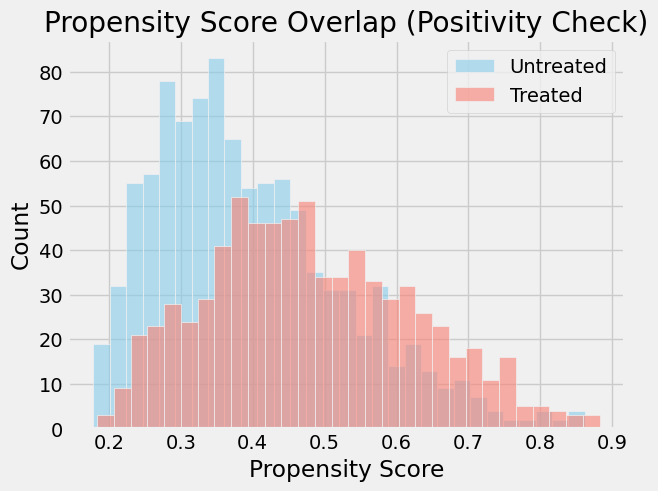

still working


In [4]:

nodes = [
    'Legislation', 'Transplant Rate', 'Income', 'Unemployment Rate',
]

edges = [
    ('Legislation', 'Transplant Rate'),
    ('Income', 'Legislation'),
    ('Unemployment Rate', 'Legislation'),
    ('Income', 'Transplant Rate'),
    ('Unemployment Rate', 'Transplant Rate')
]

gml_string_law = 'graph [directed 1\n'
for node in nodes:
    gml_string_law += f'\tnode [id "{node}" label "{node}"]\n'
for edge in edges:
    gml_string_law += f'\tedge [source "{edge[0]}" target "{edge[1]}"]\n'
gml_string_law += ']'

print("it's working")

# Instantiate the CausalModel
model_law = CausalModel(
    data=cleaned_time,
    treatment='Legislation',
    outcome='Transplant Rate',
    graph=gml_string_law
)

# Identify effect
estimand_law = model_law.identify_effect()

# Get estimate (IPW weighting)
estimate_law = model_law.estimate_effect(
    identified_estimand=estimand_law,
    method_name='backdoor.propensity_score_weighting',
    target_units='ate',


)


print("Estimated ATE via IPW:", estimate_law.value)




import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Define variables
T = 'Legislation'          # treatment
Y = 'Transplant Rate'      # outcome

# Confounders (independent variables)
X_vars = ['Income', 'Unemployment Rate']   # you can add more if desired

# Prepare the data
X = cleaned_time[X_vars]
T_data = cleaned_time[T]

# Fit logistic regression for propensity scores
ps_model = LogisticRegression(C=1e6, max_iter=5000)
ps_model.fit(X, T_data)

# Add propensity scores to dataframe
cleaned_time['propensity_score'] = ps_model.predict_proba(X)[:, 1]

# Show first few rows
display(cleaned_time[[T, Y, 'propensity_score']].head())

# Plot overlap / positivity check
sns.histplot(cleaned_time.query("Legislation == 0")["propensity_score"],
             kde=False, color="skyblue", bins=30, label="Untreated", alpha=0.6)
sns.histplot(cleaned_time.query("Legislation == 1")["propensity_score"],
             kde=False, color="salmon", bins=30, label="Treated", alpha=0.6)

plt.title("Propensity Score Overlap (Positivity Check)")
plt.xlabel("Propensity Score")
plt.ylabel("Count")
plt.legend()
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
print("still working")

In [5]:
estimand = model_law.identify_effect()
# Get estimate (S-Learner)
estimate = model_law.estimate_effect(
    identified_estimand=estimand,
    method_name='backdoor.econml.metalearners.SLearner',
    target_units='ate',
    method_params={
        'init_params': {
            'overall_model': LGBMRegressor(n_estimators=500, max_depth=10)
        },
        'fit_params': {}
    })

estimate.cate_estimates.mean()

ImportError: Error loading econml.metalearners.SLearner. Double-check the method name and ensure that all econml dependencies are installed.

In [6]:
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.linear_model import LogisticRegression

# Keep only rows with complete data in key vars
needed_cols = ['Legislation', 'Transplant Rate', 'Income', 'Unemployment Rate', 'Year', 'baseline']
# If you created a baseline outcome, add its column name here:
# needed_cols.append('Baseline_Transplant_1988')

clean = cleaned_time.dropna(subset=needed_cols).copy()

clean['Legislation']      = clean['Legislation'].astype(int)
clean['Transplant Rate']  = clean['Transplant Rate'].astype(float)
clean['Income']           = clean['Income'].astype(float)
clean['Unemployment Rate'] = clean['Unemployment Rate'].astype(float)
clean['Year']             = clean['Year'].astype(int)

# Features used in the learners
features = ['Income', 'Unemployment Rate', 'baseline']
# If you have a baseline outcome, add it:
# features.append('Baseline_Transplant_1988')

X = clean[features].copy()
T = clean['Legislation'].values.astype(int)
Y = clean['Transplant Rate'].values.astype(float)

print("Shape X:", X.shape)
print("Share treated:", T.mean())


# Add treatment as a feature
X_s = X.copy()
X_s['Legislation'] = T

s_model = LGBMRegressor(
    n_estimators=300,
    max_depth=10,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

s_model.fit(X_s, Y)

# Predict potential outcomes for everyone:
X1 = X.copy()
X1['Legislation'] = 1
X0 = X.copy()
X0['Legislation'] = 0

mu1_s = s_model.predict(X1)
mu0_s = s_model.predict(X0)

tau_s = mu1_s - mu0_s          # individual CATEs (S-learner style)
ate_s = tau_s.mean()

print("S-Learner ATE:", ate_s)
print("S-Learner tau range (min, max):", tau_s.min(), tau_s.max())


Shape X: (1739, 3)
Share treated: 0.43243243243243246
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 390
[LightGBM] [Info] Number of data points in the train set: 1739, number of used features: 4
[LightGBM] [Info] Start training from score 1.831641
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

In [7]:
#NOTE: This part was done with a lot of help from ChatGPT because my learner models stopped working suddenly
#I wasn't able to fix this (i think there may have been a dependency issue) and so i had to use a manual version
#for my learners. I left the old code in another file


# Model for treated units
model_treat = LGBMRegressor(
    n_estimators=300,
    max_depth=10,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Model for control units
model_ctrl = LGBMRegressor(
    n_estimators=300,
    max_depth=10,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=43
)

model_treat.fit(X[T == 1], Y[T == 1])
model_ctrl.fit(X[T == 0], Y[T == 0])

mu1_t = model_treat.predict(X)
mu0_t = model_ctrl.predict(X)

tau_t = mu1_t - mu0_t
ate_t = tau_t.mean()

print("T-Learner ATE:", ate_t)
print("T-Learner tau range (min, max):", tau_t.min(), tau_t.max())


# 1. Imputed treatment effects for treated and control
mu0_on_treated  = model_ctrl.predict(X[T == 1])
mu1_on_control  = model_treat.predict(X[T == 0])

D1 = Y[T == 1] - mu0_on_treated
D0 = mu1_on_control - Y[T == 0]

X_treated  = X[T == 1]
X_control  = X[T == 0]

# 2. Fit tau models on D1 and D0
tau1_model = LGBMRegressor(
    n_estimators=200,
    max_depth=10,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=44
)
tau0_model = LGBMRegressor(
    n_estimators=200,
    max_depth=10,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=45
)

tau1_model.fit(X_treated, D1)
tau0_model.fit(X_control, D0)

# 3. Propensity scores e(X) ≈ P(T=1|X)
prop_model = LogisticRegression(max_iter=1000)
prop_model.fit(X, T)
e_hat = prop_model.predict_proba(X)[:, 1]

# 4. Combine tau0/tau1 with e_hat
tau1_hat = tau1_model.predict(X)
tau0_hat = tau0_model.predict(X)

tau_x = e_hat * tau0_hat + (1 - e_hat) * tau1_hat
ate_x = tau_x.mean()

print("X-Learner ATE:", ate_x)
print("X-Learner tau range (min, max):", tau_x.min(), tau_x.max())


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 361
[LightGBM] [Info] Number of data points in the train set: 752, number of used features: 3
[LightGBM] [Info] Start training from score 1.781562
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Mean CATE (T-learner) - low baseline: 0.10523167001273306
Mean CATE (T-learner) - high baseline: -0.1548244012185751
Mean CATE (T-learner) - low income: 0.08870703441796056
Mean CATE (T-learner) - high income: -0.13289408792787827


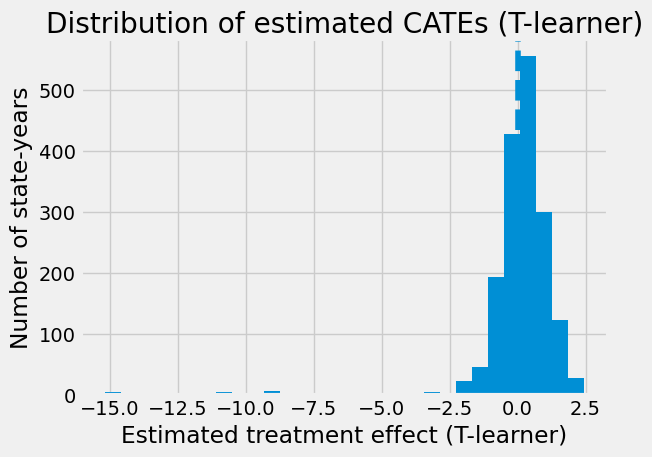

In [8]:
cleaned['tau_T'] = tau_t     # T-learner CATE


# --- choose which CATE to use ---
tau = cleaned['tau_T']   # or df['tau_X']

# Baseline: low vs high (median split)
baseline_med = cleaned['baseline'].median()
low_base  = cleaned['baseline'] <= baseline_med
high_base = cleaned['baseline'] >  baseline_med

print("Mean CATE (T-learner) - low baseline:",
      tau[low_base].mean())
print("Mean CATE (T-learner) - high baseline:",
      tau[high_base].mean())

# Income: low vs high (median split)
income_med = cleaned['Income'].median()
low_inc  = cleaned['Income'] <= income_med
high_inc = cleaned['Income'] >  income_med

print("Mean CATE (T-learner) - low income:",
      tau[low_inc].mean())
print("Mean CATE (T-learner) - high income:",
      tau[high_inc].mean())
import matplotlib.pyplot as plt

plt.hist(tau.dropna(), bins=30)
plt.axvline(0, linestyle='--')
plt.xlabel('Estimated treatment effect (T-learner)')
plt.ylabel('Number of state-years')
plt.title('Distribution of estimated CATEs (T-learner)')
plt.tight_layout()
plt.show()
